### Problem Statement
#### About the Dataset

- *Age:* Describes the age of individuals. Continuous.
- *Workclass:* Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- *fnlwgt:* Continuous.
- *education:* Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- *education-num:* Number of years spent in education. Continuous.
- *marital-status:* Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- *occupation:* Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- *relationship:* Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- *race:* White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- *sex:* Female, Male.
- *capital-gain:* Continuous.
- *capital-loss:* Continuous.
- *hours-per-week:* Continuous.
- *native-country:* United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- *salary:* >50K,<=50K



In [1]:
# Supress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np 
import pandas as pd 
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

In [3]:
df = pd.read_csv('data/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [6]:
## Rename the columns
df = df.rename(columns={'education.num':'education_num', 'marital.status':'marital_status', 'capital.gain':'capital_gain', 'capital.loss':'capital_loss', 'hours.per.week':'hours_per_week', 'native.country':'native_country'})
df.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [9]:
# Check null values in our complete dataset
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [10]:
# check duplicet value in data set
df.duplicated().sum()

24

In [11]:
# drop duplicate value from data
df.drop_duplicates(inplace=True)

In [12]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
# saprate catigorical and numerical features
categorical_features = df.select_dtypes(include="object").columns
numerical_features = df.select_dtypes(exclude="object").columns


In [14]:
categorical_features

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [15]:
numerical_features

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [16]:
df.workclass.value_counts()

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [17]:
## fetching the unique value from categorical data

for i in categorical_features:
    print(i, df[i].unique())
    
    print()
    print('='*50)
    print()

workclass ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']


education ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']


marital_status ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']


occupation ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']


relationship ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']


race ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']


sex ['Female' 'Male']


native_country ['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trin

In [18]:
df.race.value_counts()

race
White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

In [19]:
df.sex.value_counts()

sex
Male      21775
Female    10762
Name: count, dtype: int64

In [20]:
df.native_country.unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [21]:
# remove ? and replace with mode value # .mode()
df["workclass"] = df["workclass"].replace("?"," Private")
df["occupation"] = df["occupation"].replace("?"," Prof-specialty")
df["native_country"] = df["native_country"].replace("?"," United-States")

In [22]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### Data Visualization

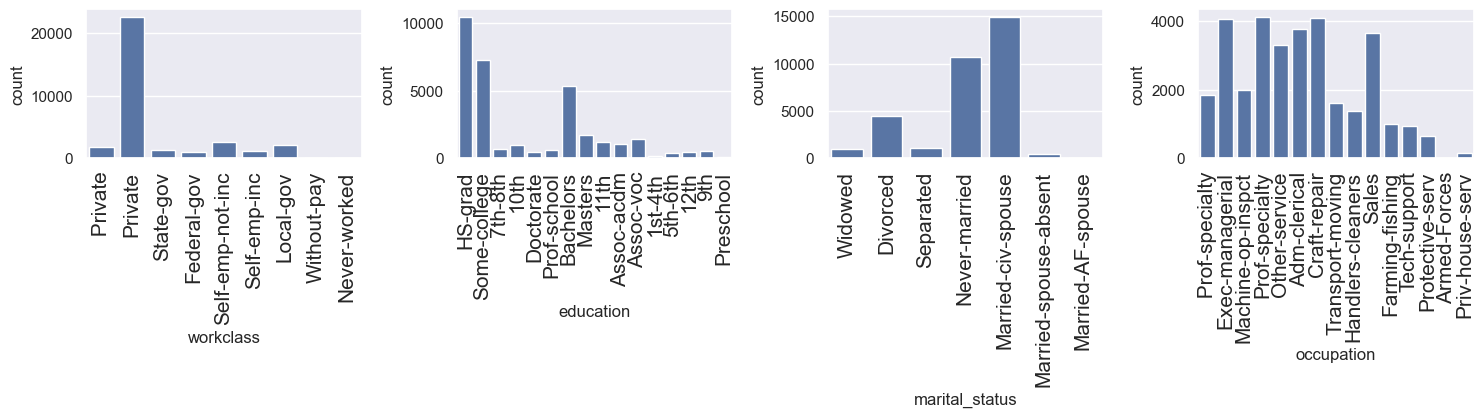

In [23]:
plt.style.use('fivethirtyeight')
sns.set(rc={"figure.figsize":(15,6)})

colmns1 = ['workclass', 'education', 'marital_status', 'occupation']

for i in range(0,len(colmns1)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=df[colmns1[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

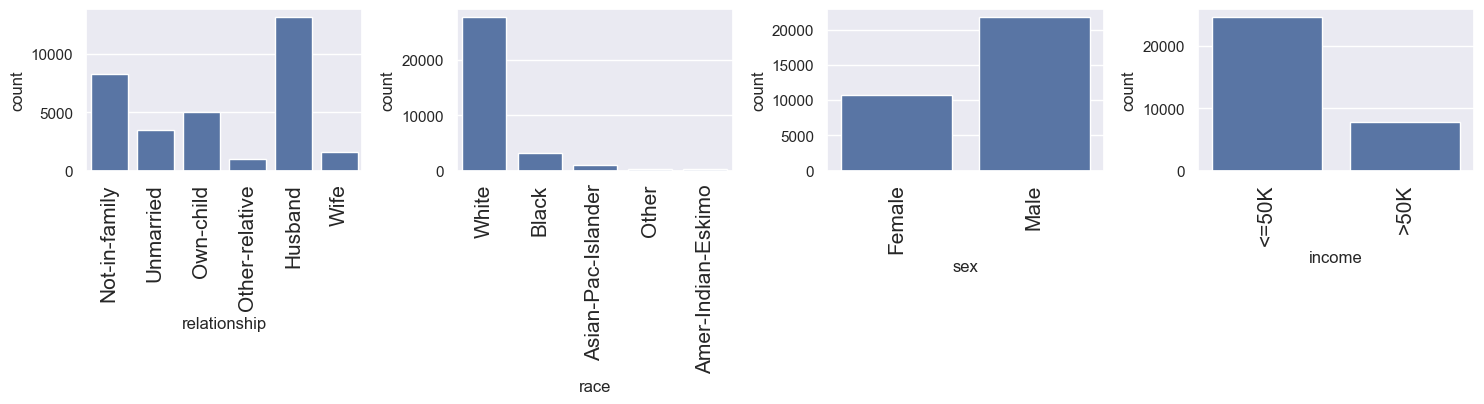

In [24]:
colmns2 = ['relationship', 'race', 'sex', 'income']

for i in range(0,len(colmns2)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=df[colmns2[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

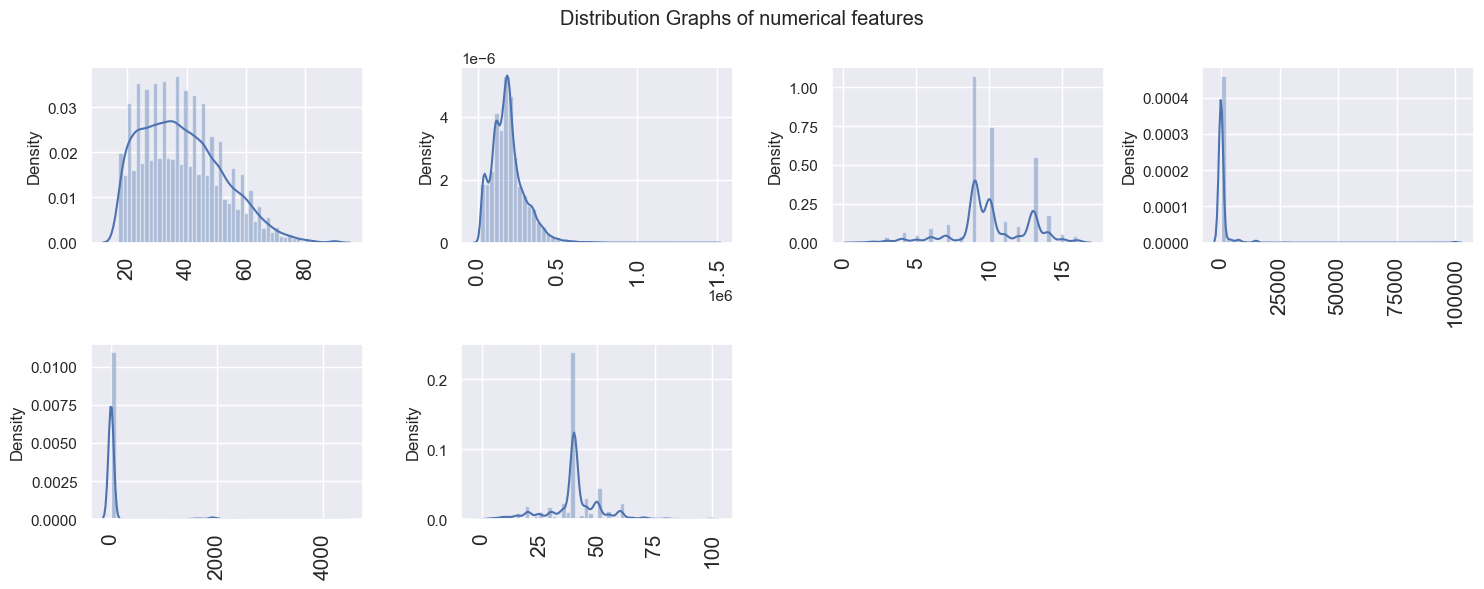

In [25]:
plt.suptitle("Distribution Graphs of numerical features")
for i in range(0, len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.distplot(x=df[numerical_features[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

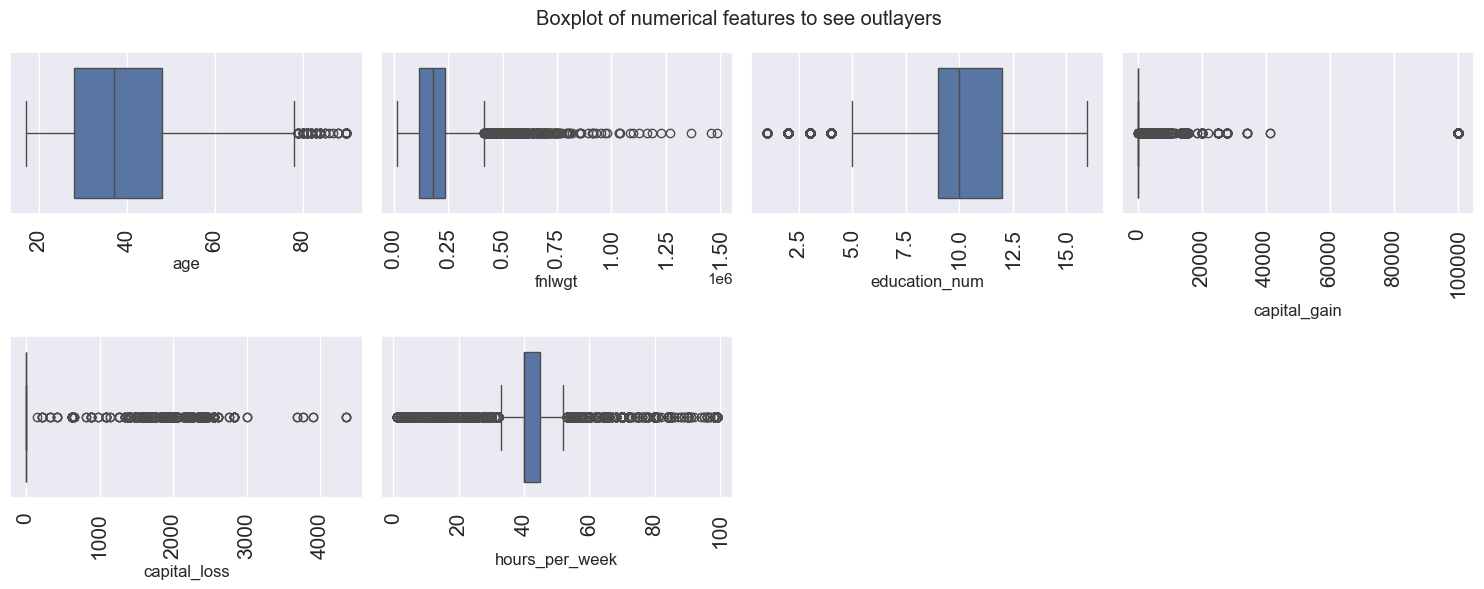

In [26]:
plt.suptitle("Boxplot of numerical features to see outlayers ")
for i in range(0,len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=df[numerical_features[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

<Axes: xlabel='income'>

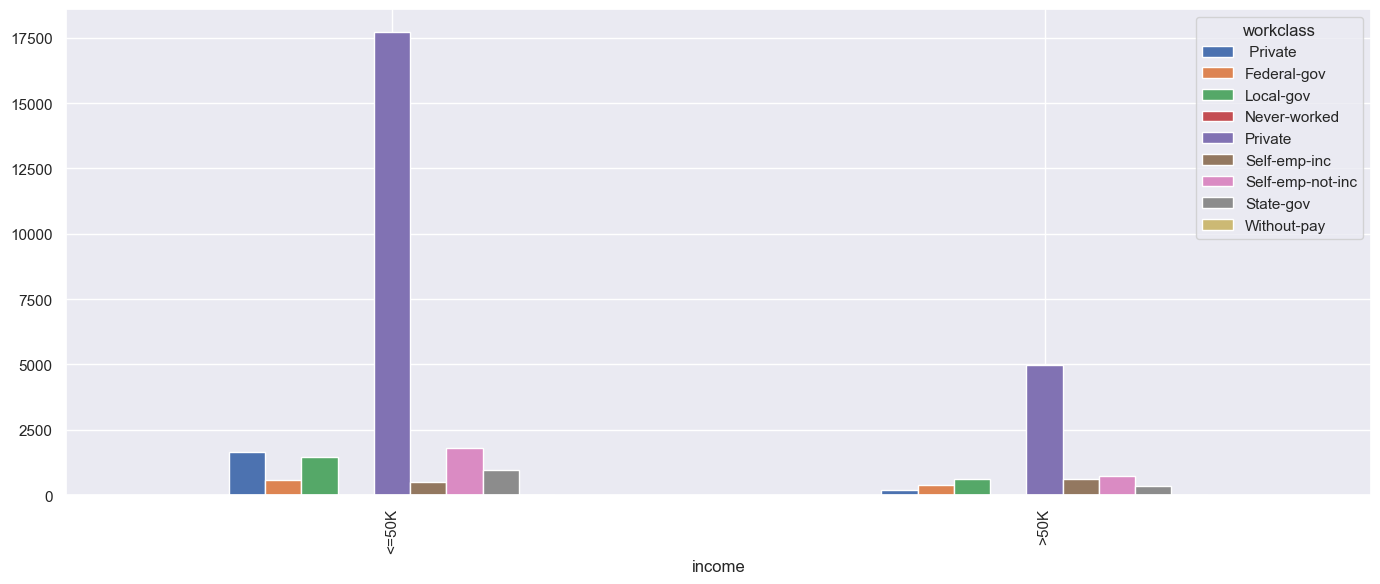

In [27]:
salary = pd.crosstab(df['income'],df['workclass'])
salary.plot(kind='bar')

<Axes: xlabel='income'>

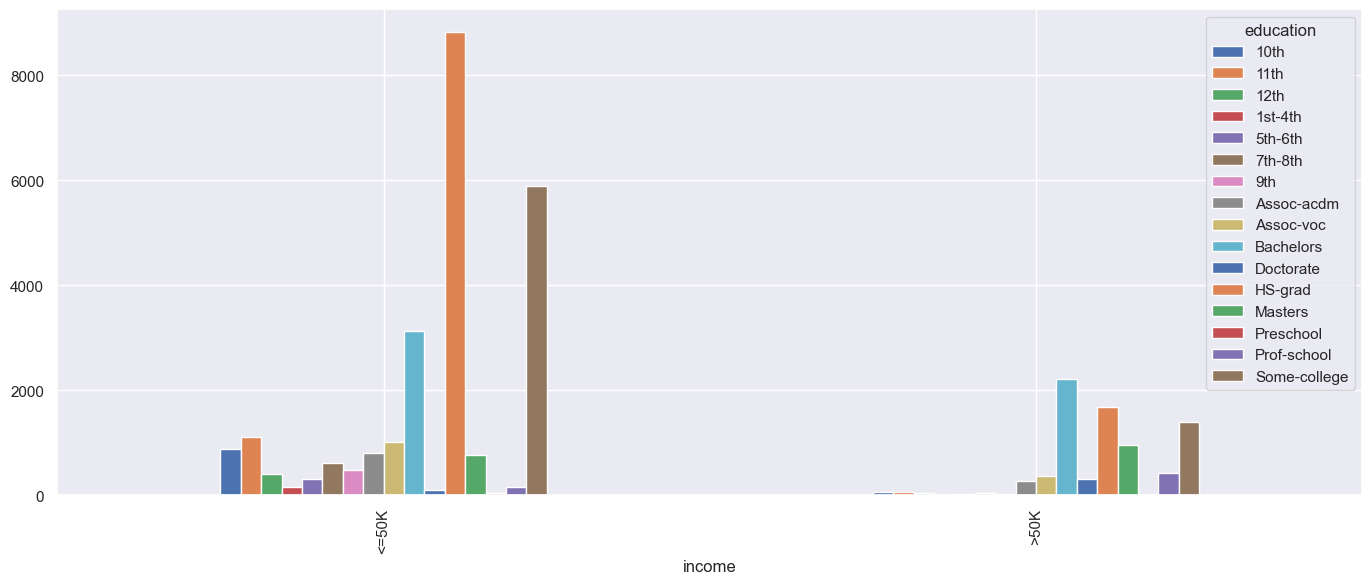

In [28]:
education = pd.crosstab(df['income'],df['education'])
education.plot(kind="bar")

<Axes: xlabel='income'>

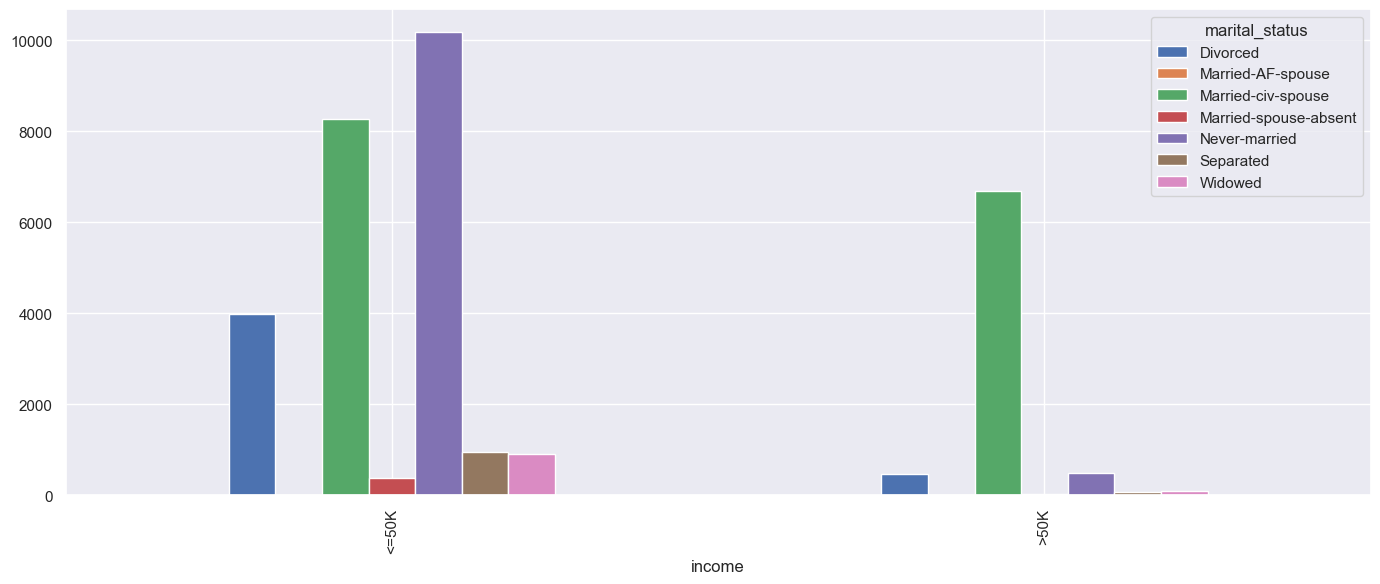

In [29]:
marital_status = pd.crosstab(df['income'],df['marital_status'])
marital_status.plot(kind="bar")

<Axes: xlabel='income'>

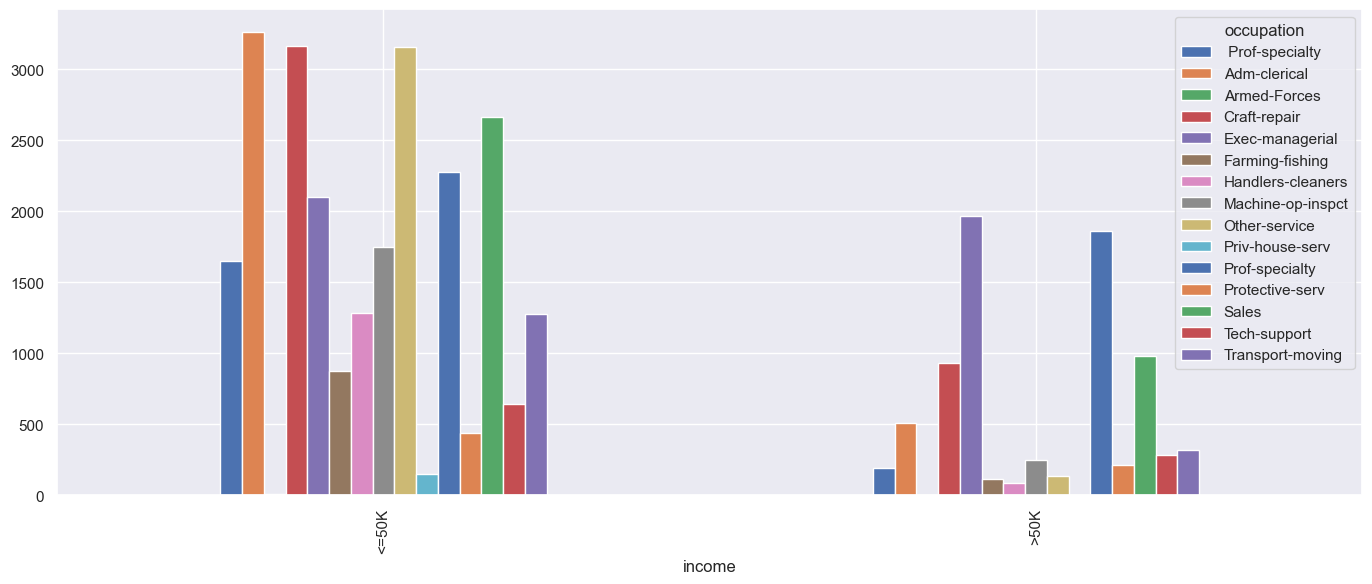

In [30]:
occupation = pd.crosstab(df['income'],df['occupation'])
occupation.plot(kind="bar")

<Axes: xlabel='income'>

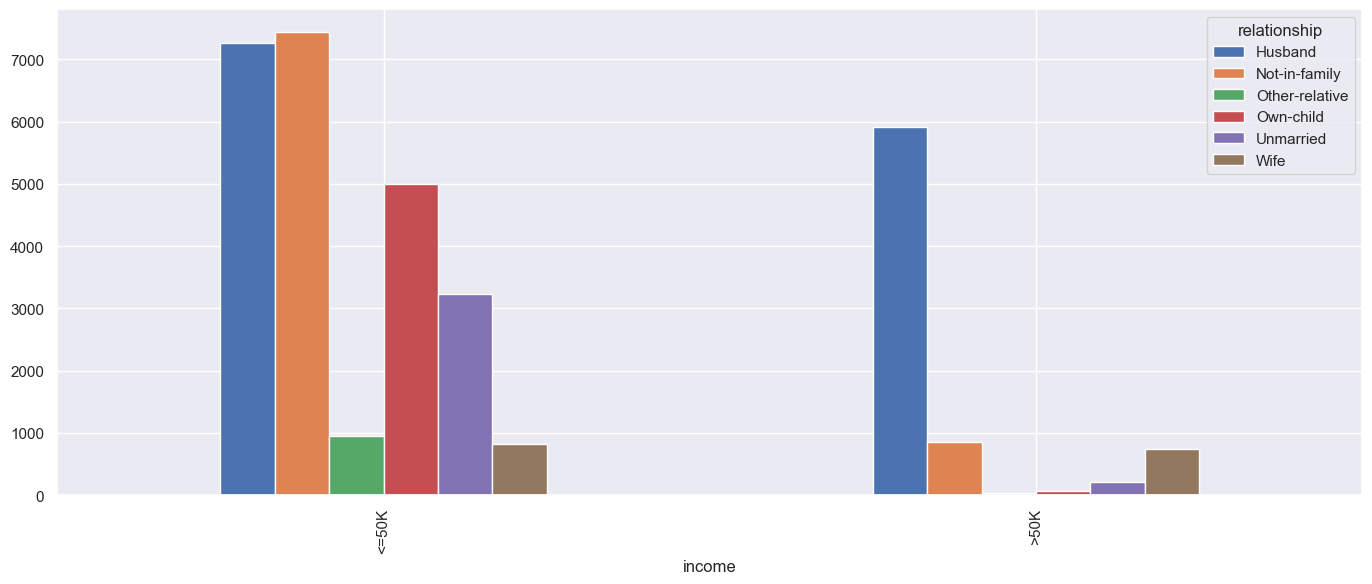

In [31]:
relationship = pd.crosstab(df['income'],df['relationship'])
relationship.plot(kind="bar")

<Axes: xlabel='income'>

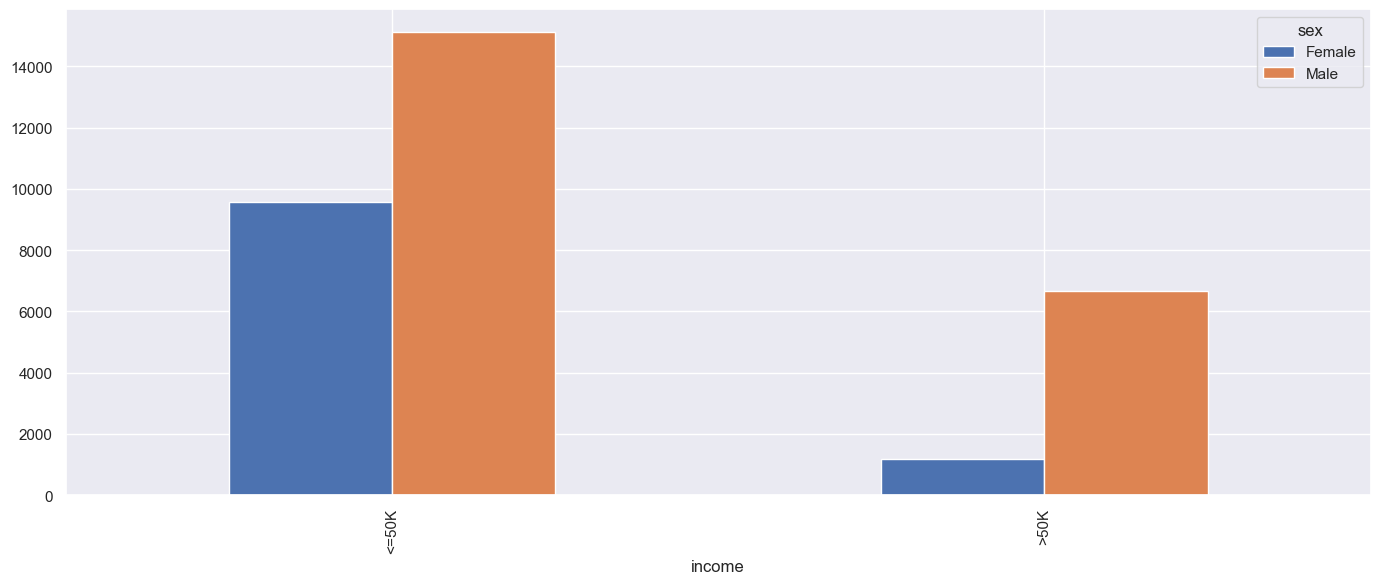

In [32]:
sex = pd.crosstab(df['income'],df['sex'])
sex.plot(kind="bar")

In [33]:
df["income"] = df["income"].map({'<=50K':0, '>50K':1})

In [34]:
df['income'].value_counts()

income
0    24698
1     7839
Name: count, dtype: int64

In [35]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


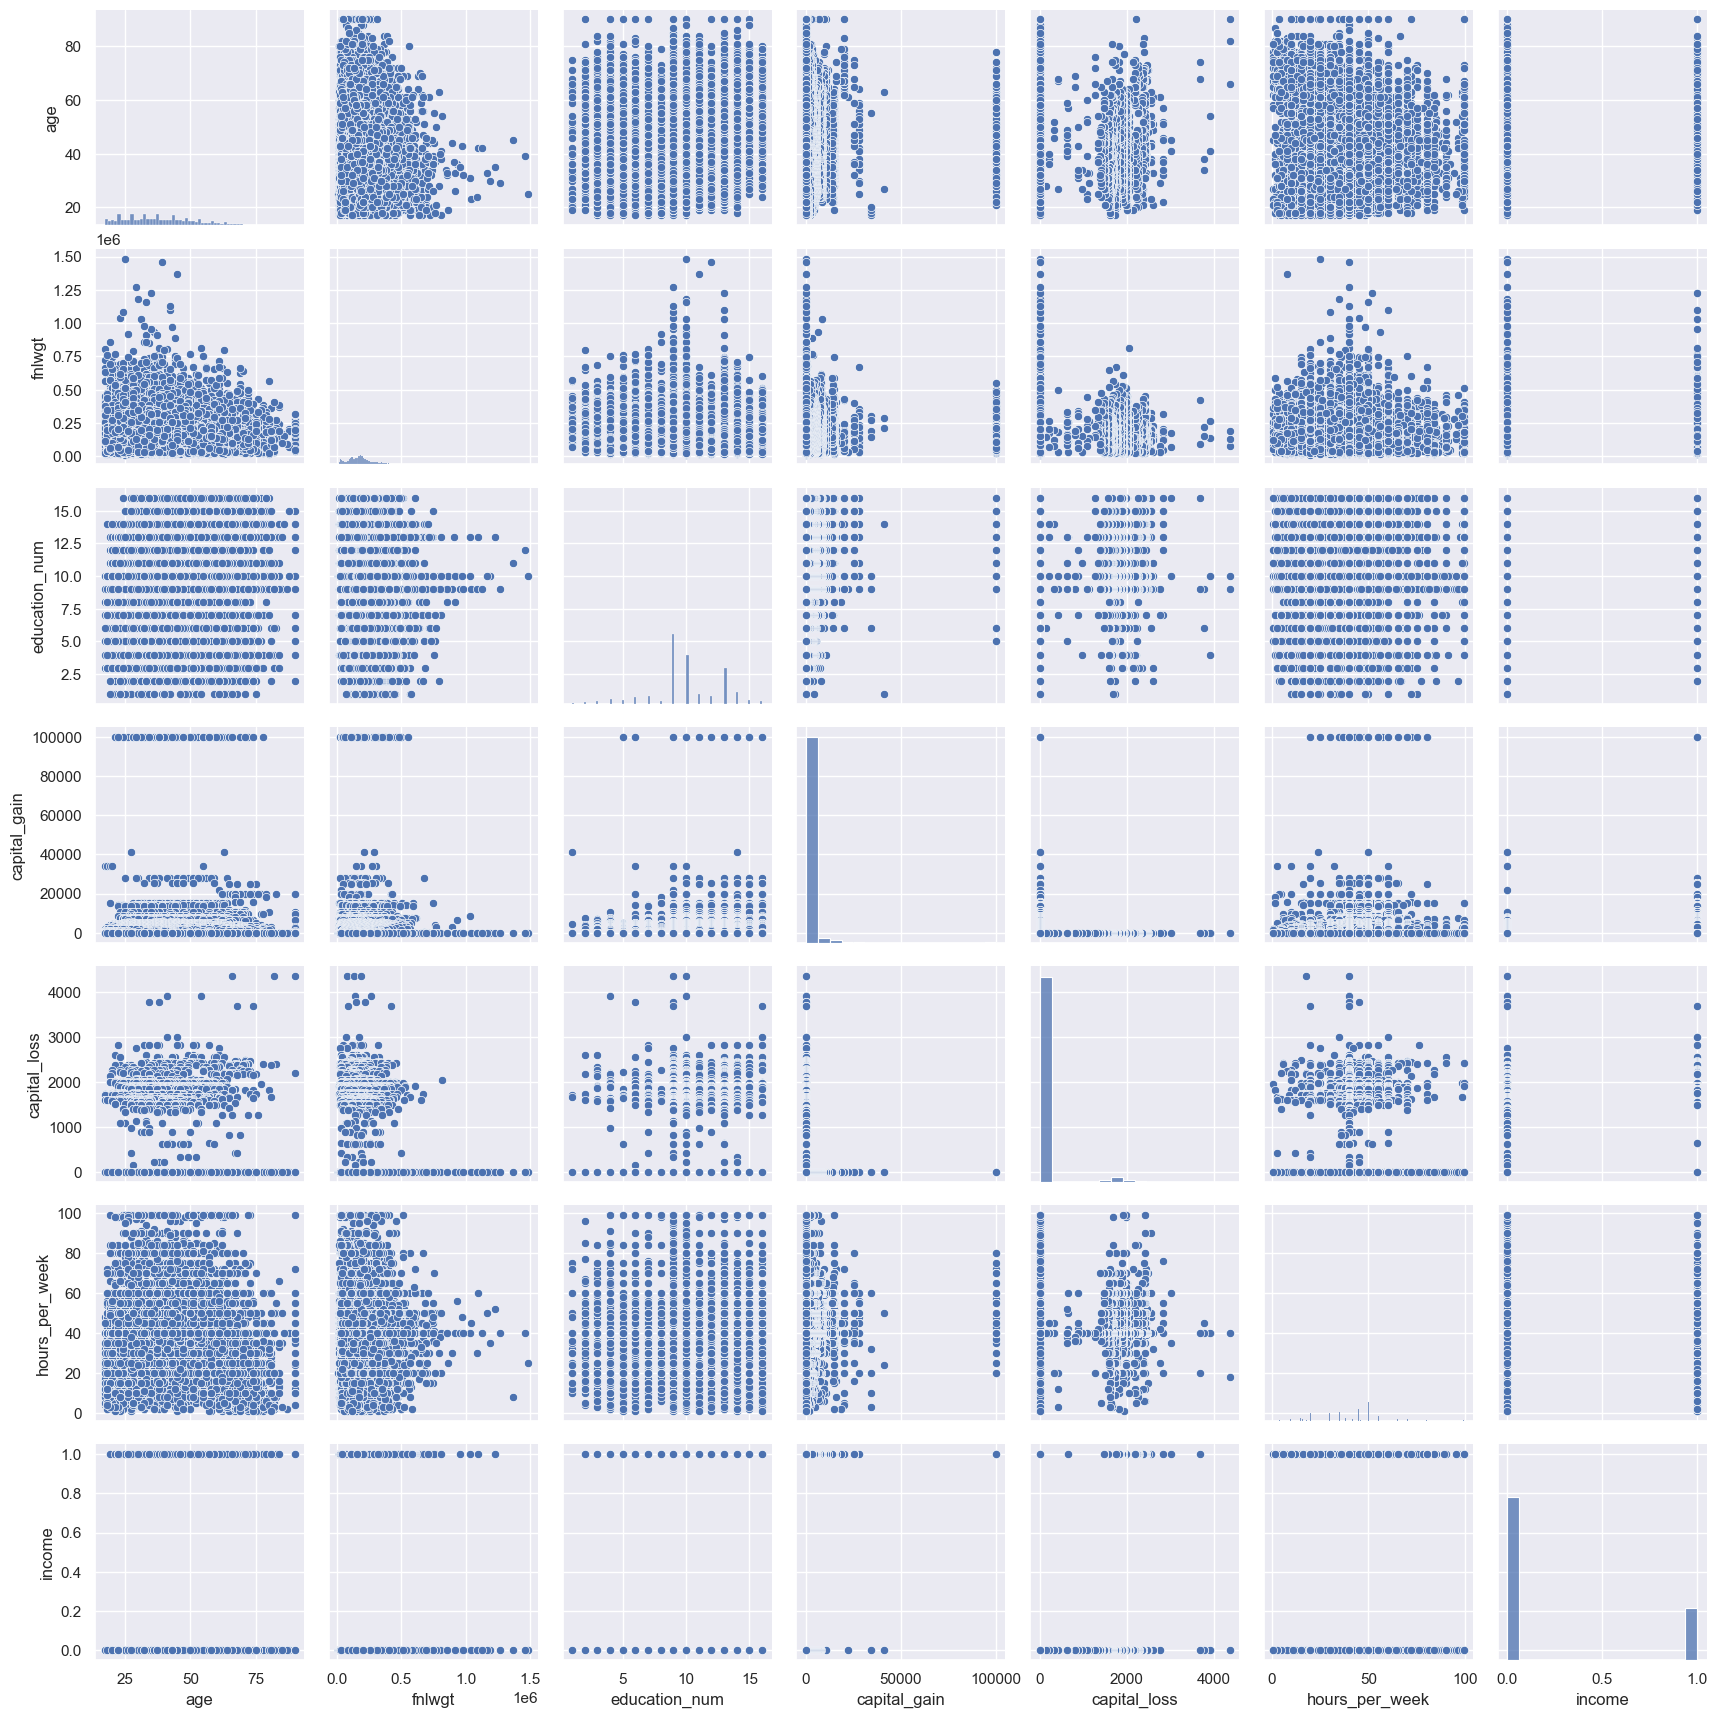

In [36]:
sns.pairplot(data=df)

In [37]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [38]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# define the categorical features
categorical_features =['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country']

# loop through the categorical features and encode them
for feature in categorical_features:
    le.fit(df[feature])
    df[feature] = le.transform(df[feature])

<Axes: >

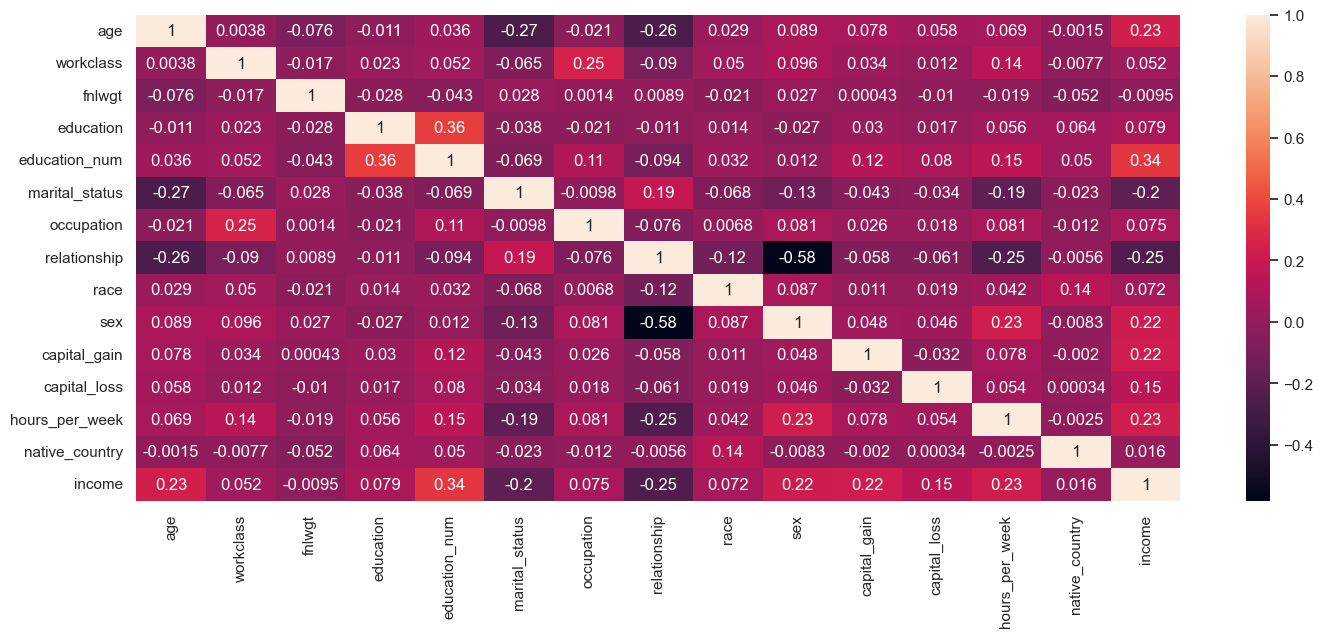

In [39]:
sns.heatmap(df.corr(),annot=True)

In [40]:
# droping education_num column because we have education ordinal encoder one
df = df.drop(columns=["education","fnlwgt", "native_country"],axis=1)


In [41]:
df.to_csv("data/cleandata.csv",index=False)

In [42]:
df.head(20)

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income
0,90,0,9,6,0,1,4,0,0,4356,40,0
1,82,4,9,6,4,1,4,0,0,4356,18,0
2,66,0,10,6,0,4,2,0,0,4356,40,0
3,54,4,4,0,7,4,4,0,0,3900,40,0
4,41,4,10,5,10,3,4,0,0,3900,40,0
5,34,4,9,0,8,4,4,0,0,3770,45,0
6,38,4,6,5,1,4,4,1,0,3770,40,0
7,74,7,16,4,10,2,4,0,0,3683,20,1
8,68,1,9,0,10,1,4,0,0,3683,40,0
9,41,4,10,4,3,4,4,1,0,3004,60,1


In [43]:
## seperate dependent and independent variables
X = df.drop("income", axis=1)
y = df["income"]

In [44]:
X.shape

(32537, 11)

In [45]:
y.shape

(32537,)

In [46]:
catigorical_features = X.select_dtypes(include="object").columns
print(catigorical_features)

Index([], dtype='object')


In [47]:
numerical_features = X.select_dtypes(exclude="object").columns
print(numerical_features)

Index(['age', 'workclass', 'education_num', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')


### Pipeline

In [48]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
#pipline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [49]:
## Numerical feature pipeline
num_pipeline = Pipeline(
    steps = [
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

## Categorical feature pipeline
cat_pipeline = Pipeline(
    steps = [
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler(with_mean=False))
    ]
)

## Column Transformation
preprocessor = ColumnTransformer(
    [
        ("num_pipeline",num_pipeline,numerical_features),
        ("cat_pipelines",cat_pipeline,catigorical_features)
    ]
)

In [50]:
X = preprocessor.fit_transform(X)

In [51]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)


In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26029, 11)
(6508, 11)
(26029,)
(6508,)


In [53]:
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,accuracy_score


### Create an Evaluate Function to give all metrics after model Training

In [54]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [55]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier()
}

model_list = []
train_score_list = []
test_score_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    # make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    train_score_list.append(model_train_r2)

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    test_score_list.append(model_test_r2)

    print('='*35)
    print('\n')



Logistic Regression
Model performance for Training set
- Root Mean Squared Error: 0.4181
- Mean Absolute Error: 0.1748
- R2 Score: 0.0491
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4158
- Mean Absolute Error: 0.1729
- R2 Score: 0.0343


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.4288
- Mean Absolute Error: 0.3677
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4232
- Mean Absolute Error: 0.3629
- R2 Score: -0.0005


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.3678
- Mean Absolute Error: 0.2966
- R2 Score: 0.2642
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3673
- Mean Absolute Error: 0.2960
- R2 Score: 0.2463


K-Neighbors Classifier
Model performance for Training set
- Root Mean Squared Error: 0.3458
- Mean Absolute Error: 0.1196
- R2 Score: 0.3494
-------------------

In [56]:
pd.DataFrame(list(zip(model_list, train_score_list, test_score_list)), columns=['Model Name', 'Train_R2_Score', 'Test_R2_Score']).sort_values(by=["Train_R2_Score"],ascending=False)


,Model Name,Train_R2_Score,Test_R2_Score
4,Decision Tree Classifier,0.875652,-0.019751
5,Random Forest Classifier,0.875234,0.176818
6,XGBClassifier,0.445135,0.301282
3,K-Neighbors Classifier,0.349419,0.080679
2,Ridge,0.264207,0.246317
7,AdaBoostClassifier,0.238237,0.223170
0,Logistic Regression,0.049102,0.034327
1,Lasso,0.000000,-0.000474


### Use Hyperparemetertuning

## Logistic Regression

In [57]:
lr = LogisticRegression()

In [58]:
param_grid = {
    "class_weight":["balanced"],
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
    
}

In [59]:
grid = GridSearchCV(estimator=lr,param_grid=param_grid,cv=5,n_jobs=-1, verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=3)

In [60]:
grid.best_params_

{'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}

In [61]:
grid.score(X_train,y_train)

0.7714472319336125

In [62]:
y_pred = grid.predict(X_test)

In [63]:
accuracy_score(y_test,y_pred)

0.7690534726490473

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.77      0.84      4988
           1       0.50      0.76      0.61      1520

    accuracy                           0.77      6508
   macro avg       0.71      0.77      0.72      6508
weighted avg       0.82      0.77      0.78      6508



### Decision Tree

In [65]:
dT = DecisionTreeClassifier()

In [66]:
param_grid = {
    "class_weight":["balanced"],
    "criterion":['gini',"entropy","log_loss"],
    "splitter":['best','random'],
    "max_depth":[3,4,5,6],
    "min_samples_split":[2,3,4,5],
    "min_samples_leaf":[1,2,3],
    "max_features":["auto","sqrt","log2"]
}

In [67]:
grid_search = GridSearchCV(estimator=dT,param_grid=param_grid,cv=5,scoring="accuracy")
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [68]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'best'}

In [69]:
grid_search.score(X_train,y_train)


0.7609973491106073

In [70]:
y_pred = grid_search.predict(X_test)

In [71]:
accuracy_score(y_test,y_pred)

0.7480024585125998

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.71      0.81      4988
           1       0.48      0.86      0.61      1520

    accuracy                           0.75      6508
   macro avg       0.71      0.79      0.71      6508
weighted avg       0.83      0.75      0.77      6508



### Randomforest

In [73]:
rf = RandomForestClassifier()

In [74]:
param_grid = {
    "class_weight":["balanced"],
    'n_estimators': [20, 50, 30],
    'max_depth': [10, 8, 5],
    'min_samples_split': [2, 5, 10],
}

In [ ]:
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,scoring="accuracy")
grid_search.fit(X_train,y_train)


In [ ]:
grid_search.best_params_

In [ ]:
grid_search.score(X_train,y_train)

In [ ]:
y_pred = grid_search.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
print(confusion_matrix(y_test,y_pred))

### XGBoost

In [ ]:
XG = XGBClassifier()

In [ ]:
param_grid = {
    'learning_rate':[.1,.01,.05,.001],
    'n_estimators': [8,16,32,64,128,256]
}

In [ ]:
grid_search = GridSearchCV(estimator=XG,param_grid=param_grid,cv=5,scoring="accuracy")
grid_search.fit(X_train,y_train)


In [ ]:
grid_search.best_params_

In [ ]:
grid_search.score(X_train,y_train)

In [ ]:
y_pred = grid_search.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
print(confusion_matrix(y_test,y_pred))

In [ ]:
params_grid = {
                "Random Forest":{
                    "class_weight":["balanced"],
                    'n_estimators': [20, 50, 30],
                    'max_depth': [10, 8, 5],
                    'min_samples_split': [2, 5, 10],
                },
                "Decision Tree":{
                    "class_weight":["balanced"],
                    "criterion":['gini',"entropy","log_loss"],
                    "splitter":['best','random'],
                    "max_depth":[3,4,5,6],
                    "min_samples_split":[2,3,4,5],
                    "min_samples_leaf":[1,2,3],
                    "max_features":["auto","sqrt","log2"]
                },
                "Logastic":{
                    "class_weight":["balanced"],
                    'penalty': ['l1', 'l2'],
                    'C': [0.001, 0.01, 0.1, 1, 10, 100],
                    'solver': ['liblinear', 'saga']
                },
                "XGBoost":{
                    'learning_rate':[.1,.01,.05,.001],
                    'n_estimators': [8,16,32,64,128,256]
                },
    
            }